In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, date,timedelta

In [2]:
trans_data = pd.read_csv('transaction.csv')
trans_data.head()

,Consumer ID,Order ID,Month,Year,Period,Total order value,Discount,Line Value (net discount),Line SKU Production Cost,Line Category,Line SKU,Average Time between Purchases
0,13121938,13121938B,3,2020,3/1/2020,168 €,0 €,168 €,25 €,Small leather goods,SMA4,NaN
1,13121938,13121938C,5,2020,5/1/2020,220 €,0 €,220 €,40 €,Fragrances,FRA4,2.0
2,13121938,13121938D,7,2020,7/1/2020,240 €,0 €,240 €,43 €,Fragrances,FRA5,2.0
3,13139819,13139819A,1,2020,1/1/2020,313 €,63 €,250 €,94 €,Accessories,ACC4,NaN
4,13139819,13139819B,9,2020,9/1/2020,951 €,0 €,951 €,247 €,Mini bags,MIN3,8.0


In [3]:
cust_data = pd.read_csv('customer.csv')
cust_data.head()

,Consumer ID,Gender,Country,Age Range,Month,Year,Marketing optin,Status,Number of orders,New active,New repeaters,Consumer LTV
0,13139819,F,Italy,25-29,1,2020,0,Active,4,0,1,3160
1,13139919,F,Italy,30-34,1,2020,0,Active,4,0,1,4794
2,13010119,F,Italy,18-24,1,2020,0,Active,4,0,1,2063
3,13110119,F,Italy,30-34,1,2020,1,Active,4,0,1,2058
4,13132319,F,Italy,18-24,1,2020,1,Active,4,0,1,1648


In [4]:
# dimension of transactions
trans_data.shape

(3678, 12)

In [5]:
# dimension of customer
cust_data.shape

(3187, 12)

In [6]:
# col rename for transaction
trans_data.rename(columns={'Consumer ID':'consumer_id','Order ID':'order_id','Month':'month','Year':'year','Period':'period','Total order value':'total_order_value',
                                        'Line Value (net discount)':'line_value','Line SKU Production Cost':'line_sku_production_cost',
                                        'Line Category':'line_category','Line SKU':'line_sku',
                                        'Average Time between Purchases':'average_time_between_purchases','Discount':'discount'},inplace = True)
trans_data.head()

,consumer_id,order_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
0,13121938,13121938B,3,2020,3/1/2020,168 €,0 €,168 €,25 €,Small leather goods,SMA4,NaN
1,13121938,13121938C,5,2020,5/1/2020,220 €,0 €,220 €,40 €,Fragrances,FRA4,2.0
2,13121938,13121938D,7,2020,7/1/2020,240 €,0 €,240 €,43 €,Fragrances,FRA5,2.0
3,13139819,13139819A,1,2020,1/1/2020,313 €,63 €,250 €,94 €,Accessories,ACC4,NaN
4,13139819,13139819B,9,2020,9/1/2020,951 €,0 €,951 €,247 €,Mini bags,MIN3,8.0


In [7]:
# col rename for cust
cust_data.rename(columns={'Consumer ID':'consumer_id','Age Range':'age_range','Marketing optin':'marketing_option',
                          'Number of orders':'num_of_orders','New active':'new_active',
                          'New repeaters':'new_repeaters','Consumer LTV':'consumer_ltv',
                          'Gender':'gender','Month':'month','Year':'year','Status':'status','Country':'country'},inplace = True)
cust_data.head()

,consumer_id,gender,country,age_range,month,year,marketing_option,status,num_of_orders,new_active,new_repeaters,consumer_ltv
0,13139819,F,Italy,25-29,1,2020,0,Active,4,0,1,3160
1,13139919,F,Italy,30-34,1,2020,0,Active,4,0,1,4794
2,13010119,F,Italy,18-24,1,2020,0,Active,4,0,1,2063
3,13110119,F,Italy,30-34,1,2020,1,Active,4,0,1,2058
4,13132319,F,Italy,18-24,1,2020,1,Active,4,0,1,1648


In [8]:
# remove duplicate
trans_data.drop_duplicates()

,consumer_id,order_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
0,13121938,13121938B,3,2020,3/1/2020,168 €,0 €,168 €,25 €,Small leather goods,SMA4,NaN
1,13121938,13121938C,5,2020,5/1/2020,220 €,0 €,220 €,40 €,Fragrances,FRA4,2.0
2,13121938,13121938D,7,2020,7/1/2020,240 €,0 €,240 €,43 €,Fragrances,FRA5,2.0
3,13139819,13139819A,1,2020,1/1/2020,313 €,63 €,250 €,94 €,Accessories,ACC4,NaN
4,13139819,13139819B,9,2020,9/1/2020,951 €,0 €,951 €,247 €,Mini bags,MIN3,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,55010719,55010719A,10,2019,10/1/2019,240 €,48 €,192 €,43 €,Fragrances,FRA5,NaN
3674,55010819,55010819A,10,2019,10/1/2019,205 €,41 €,164 €,37 €,Fragrances,FRA3,NaN
3675,55010919,55010919A,10,2019,10/1/2019,192 €,38 €,154 €,35 €,Fragrances,FRA1,NaN
3676,55011019,55011019A,10,2019,10/1/2019,488 €,98 €,390 €,156 €,Sandals,SAN4,NaN


In [9]:
# remove duplicate
cust_data.drop_duplicates()

,consumer_id,gender,country,age_range,month,year,marketing_option,status,num_of_orders,new_active,new_repeaters,consumer_ltv
0,13139819,F,Italy,25-29,1,2020,0,Active,4,0,1,3160
1,13139919,F,Italy,30-34,1,2020,0,Active,4,0,1,4794
2,13010119,F,Italy,18-24,1,2020,0,Active,4,0,1,2063
3,13110119,F,Italy,30-34,1,2020,1,Active,4,0,1,2058
4,13132319,F,Italy,18-24,1,2020,1,Active,4,0,1,1648
...,...,...,...,...,...,...,...,...,...,...,...,...
3182,12740209,F,Saudi Arabia,35-39,1,2020,1,Active,1,1,0,168
3183,12740210,M,Italy,18-24,1,2020,0,Active,1,1,0,387
3184,12740211,F,Italy,18-24,1,2020,1,Active,1,1,0,579
3185,12740212,M,Italy,25-29,1,2020,0,Active,2,0,1,724


In [10]:
# custid unique key 
cust_data.consumer_id.nunique()

3187

In [11]:
# check null rows
trans_data.isnull().sum().sum()

3190

In [12]:
# check null row
cust_data.isnull().sum().sum()

0

In [13]:
# check null values
trans_data.isnull().sum()

consumer_id                          0
order_id                             2
month                                0
year                                 0
period                               0
total_order_value                    0
discount                             0
line_value                           0
line_sku_production_cost             0
line_category                        0
line_sku                             0
average_time_between_purchases    3188
dtype: int64

In [14]:
# check null values
cust_data.isnull().sum()

consumer_id         0
gender              0
country             0
age_range           0
month               0
year                0
marketing_option    0
status              0
num_of_orders       0
new_active          0
new_repeaters       0
consumer_ltv        0
dtype: int64

In [15]:
# check na values
trans_data.isna().sum()

consumer_id                          0
order_id                             2
month                                0
year                                 0
period                               0
total_order_value                    0
discount                             0
line_value                           0
line_sku_production_cost             0
line_category                        0
line_sku                             0
average_time_between_purchases    3188
dtype: int64

In [16]:
# check na values
cust_data.isna().sum()

consumer_id         0
gender              0
country             0
age_range           0
month               0
year                0
marketing_option    0
status              0
num_of_orders       0
new_active          0
new_repeaters       0
consumer_ltv        0
dtype: int64

In [17]:
# filter record for transaction null orderid
trans_data[trans_data.order_id.isnull()]

,consumer_id,order_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
98,13134019,NaN,3,2020,3/1/2020,447 €,67 €,380 €,156 €,Apparel,APP3,0.0
99,13134019,NaN,3,2020,3/1/2020,345 €,52 €,293 €,107 €,Apparel,APP2,0.0


In [18]:
#filter record for transaction nan orderid
trans_data[trans_data.order_id.isna()]

,consumer_id,order_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
98,13134019,NaN,3,2020,3/1/2020,447 €,67 €,380 €,156 €,Apparel,APP3,0.0
99,13134019,NaN,3,2020,3/1/2020,345 €,52 €,293 €,107 €,Apparel,APP2,0.0


In [19]:
# drop na rows
trans_data.dropna(axis=0,how='any',subset=['order_id'], inplace = True)
len(trans_data)

3676

In [20]:
# drop na rows
cust_data.dropna()
len(cust_data)

3187

In [21]:
trans_data.columns

Index(['consumer_id', 'order_id', 'month', 'year', 'period',
       'total_order_value', 'discount', 'line_value',
       'line_sku_production_cost', 'line_category', 'line_sku',
       'average_time_between_purchases'],
      dtype='object')

In [22]:
# reorder columns
trans_data = trans_data[['order_id','consumer_id', 'month', 'year', 'period',
       'total_order_value', 'discount', 'line_value',
       'line_sku_production_cost', 'line_category', 'line_sku',
       'average_time_between_purchases'
]]

In [23]:
trans_data.head()

,order_id,consumer_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
0,13121938B,13121938,3,2020,3/1/2020,168 €,0 €,168 €,25 €,Small leather goods,SMA4,NaN
1,13121938C,13121938,5,2020,5/1/2020,220 €,0 €,220 €,40 €,Fragrances,FRA4,2.0
2,13121938D,13121938,7,2020,7/1/2020,240 €,0 €,240 €,43 €,Fragrances,FRA5,2.0
3,13139819A,13139819,1,2020,1/1/2020,313 €,63 €,250 €,94 €,Accessories,ACC4,NaN
4,13139819B,13139819,9,2020,9/1/2020,951 €,0 €,951 €,247 €,Mini bags,MIN3,8.0


In [24]:
# set index
trans_data.set_index('order_id')
trans_data.head()

,order_id,consumer_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
0,13121938B,13121938,3,2020,3/1/2020,168 €,0 €,168 €,25 €,Small leather goods,SMA4,NaN
1,13121938C,13121938,5,2020,5/1/2020,220 €,0 €,220 €,40 €,Fragrances,FRA4,2.0
2,13121938D,13121938,7,2020,7/1/2020,240 €,0 €,240 €,43 €,Fragrances,FRA5,2.0
3,13139819A,13139819,1,2020,1/1/2020,313 €,63 €,250 €,94 €,Accessories,ACC4,NaN
4,13139819B,13139819,9,2020,9/1/2020,951 €,0 €,951 €,247 €,Mini bags,MIN3,8.0


In [25]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   order_id                        3676 non-null   object 
 1   consumer_id                     3676 non-null   int64  
 2   month                           3676 non-null   int64  
 3   year                            3676 non-null   int64  
 4   period                          3676 non-null   object 
 5   total_order_value               3676 non-null   object 
 6   discount                        3676 non-null   object 
 7   line_value                      3676 non-null   object 
 8   line_sku_production_cost        3676 non-null   object 
 9   line_category                   3676 non-null   object 
 10  line_sku                        3676 non-null   object 
 11  average_time_between_purchases  488 non-null    float64
dtypes: float64(1), int64(3), object(8)

In [26]:
trans_data.dtypes

order_id                           object
consumer_id                         int64
month                               int64
year                                int64
period                             object
total_order_value                  object
discount                           object
line_value                         object
line_sku_production_cost           object
line_category                      object
line_sku                           object
average_time_between_purchases    float64
dtype: object

In [27]:
cust_data.dtypes

consumer_id          int64
gender              object
country             object
age_range           object
month                int64
year                 int64
marketing_option     int64
status              object
num_of_orders        int64
new_active           int64
new_repeaters        int64
consumer_ltv         int64
dtype: object

### Customer Data Analysis

In [28]:
# examine field values
cust_data.age_range.value_counts()

18-24    1355
30-34     550
25-29     549
35-39     523
40+       210
Name: age_range, dtype: int64

In [29]:
len(cust_data[cust_data.status=='Lost'])

486

In [30]:
# remove inactive customers
cust_data = cust_data.drop(labels=cust_data.loc[cust_data.status=='Lost'].index,axis=0)

In [31]:
# manipulate customer data, split age group
age_list = cust_data['age_range'].str.rsplit(n=2,pat="-",expand=True)

In [32]:
cust_data = pd.concat([cust_data, age_list], axis=1)

In [33]:
cust_data = cust_data.rename(columns = {0:"lower_age",1:"upper_age"})
cust_data.dtypes

consumer_id          int64
gender              object
country             object
age_range           object
month                int64
year                 int64
marketing_option     int64
status              object
num_of_orders        int64
new_active           int64
new_repeaters        int64
consumer_ltv         int64
lower_age           object
upper_age           object
dtype: object

In [34]:
cust_data['country'].unique()

array(['Italy', 'Czech Republic', 'Austria', 'Hungary', 'Germany',
       'Spain', 'Saudi Arabia', 'Greece', 'France', 'USA'], dtype=object)

C:\Users\JC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


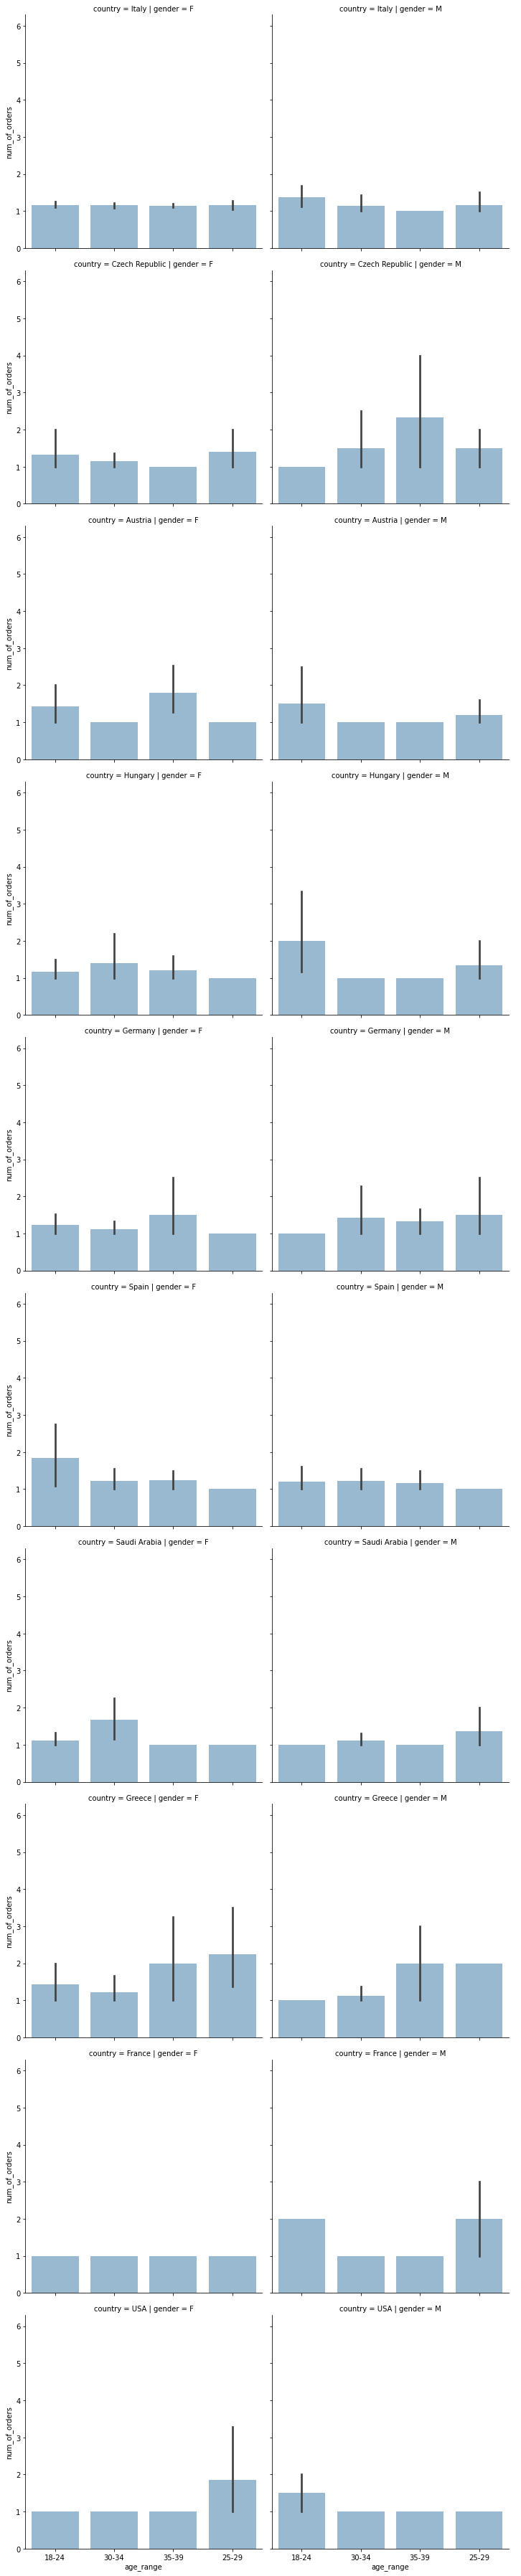

In [35]:
# segment by multi-plot grid by gender, age, country
g = sns.FacetGrid(cust_data, row="country", col="gender",height=5, aspect=1)
g.map(sns.barplot,"age_range", "num_of_orders",alpha=.5)
g.add_legend()

C:\Users\JC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


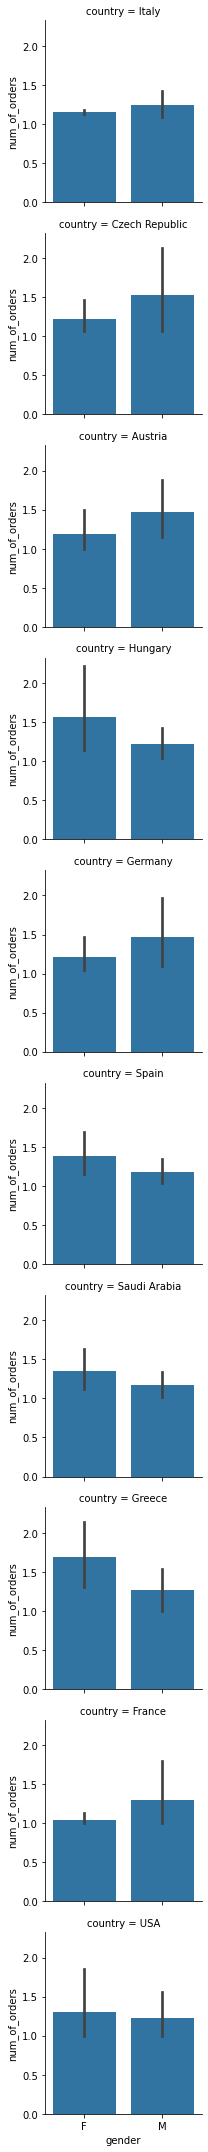

In [36]:
# Segment by gender & country
g = sns.FacetGrid(cust_data, row="country")
g.map(sns.barplot,"gender","num_of_orders")

C:\Users\JC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


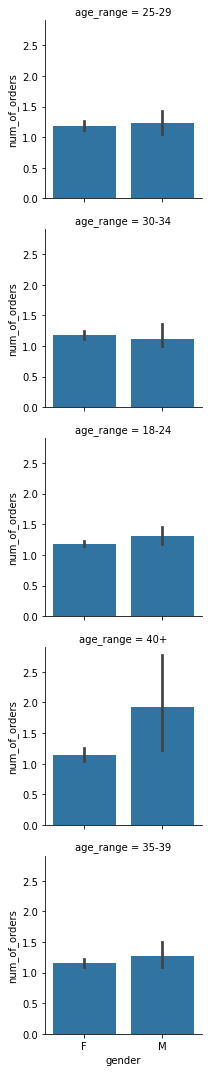

In [37]:
# Segment by gender & age_range
g = sns.FacetGrid(cust_data, row="age_range")
g.map(sns.barplot,"gender","num_of_orders")

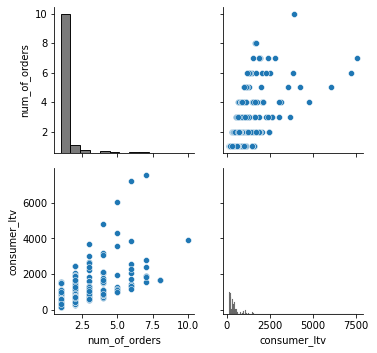

In [38]:
## pair grid for num of orders & consumer ltv value correlation using hist & scatter plot
g = sns.PairGrid(cust_data, vars=['num_of_orders','consumer_ltv'])
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

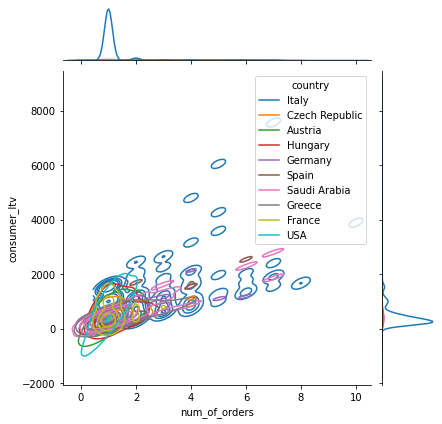

In [39]:
# dist joint plot bivariate
sns.jointplot(data=cust_data, x="num_of_orders", y="consumer_ltv", hue='country',kind="kde")

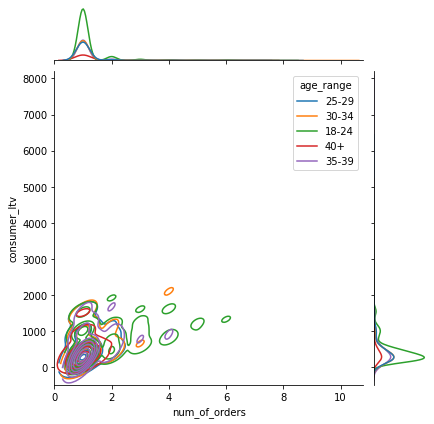

In [40]:
# dist joint plot bivariate
sns.jointplot(data=cust_data, x="num_of_orders", y="consumer_ltv", hue='age_range',kind="kde")

([<matplotlib.patches.Wedge at 0x22ddf82a700>,
 [Text(0.8438119400385032, 0.7056779788603706, 'Saudi Arabia'),
  Text(-0.33681666651822684, 1.0471649980569202, 'Italy'),
  Text(-1.0420589957742576, 0.3522968199202851, 'Germany'),
  Text(-0.9859584640807842, -0.48773548887430884, 'Spain'),
  Text(-0.5593842380434401, -0.9471479684972989, 'Austria'),
  Text(-0.08142904247361066, -1.0969819100795741, 'Greece'),
  Text(0.39825976700272886, -1.0253726922377697, 'Czech Republic'),
  Text(0.7892579560164323, -0.7662061595058888, 'Hungary'),
  Text(1.006660165846238, -0.4434358020034299, 'France'),
  Text(1.0902314061497982, -0.1462719420963366, 'USA')])

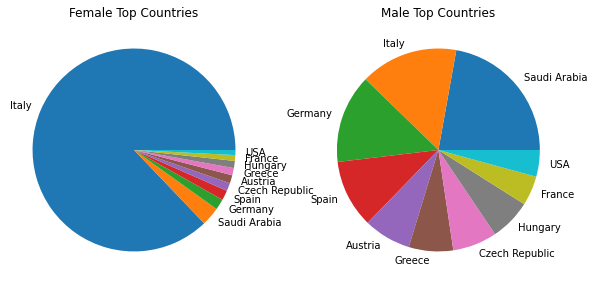

In [41]:
# Top Countries by Gender
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 20))

df_f = cust_data[cust_data.gender=='F'].country.value_counts().sort_values(ascending=False)
f_list =  cust_data[cust_data.gender=='F'].country.value_counts().sort_values(ascending=False).index
ax1.set_title('Female Top Countries')
ax1.pie(df_f,labels=f_list)

df_m = cust_data[cust_data.gender=='M'].country.value_counts().sort_values(ascending=False)
m_list =  cust_data[cust_data.gender=='M'].country.value_counts().sort_values(ascending=False).index
ax2.set_title('Male Top Countries')
ax2.pie(df_m,labels=m_list)

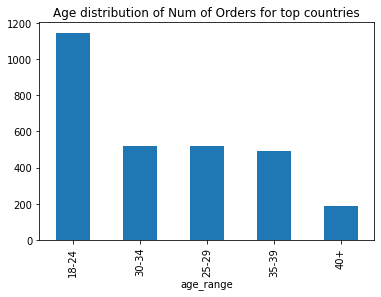

In [42]:
# Age distribution of Num of Orders for top countries

top_country_list=['Italy','Saudi Arabia','Germany','Spain']
cust_data[cust_data.country.isin(top_country_list)].groupby(by='age_range').num_of_orders.sum().sort_values(ascending=False).plot(kind = 'bar',title='Age distribution of Num of Orders for top countries')

a = cust_data[cust_data.country.isin(top_country_list)].groupby(by='age_range').num_of_orders.sum().sort_values(ascending=False)

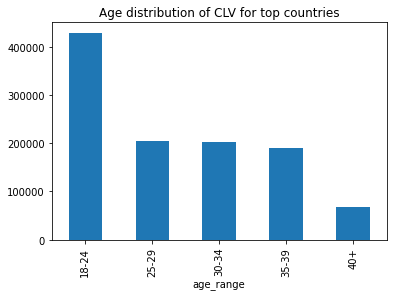

In [43]:
# Age distribution of Customer Lifetime Value CLV for top countries

top_country_list=['Italy','Saudi Arabia','Germany','Spain']
cust_data[cust_data.country.isin(top_country_list)].groupby(by='age_range').consumer_ltv.sum().sort_values(ascending=False).plot(kind = 'bar',title='Age distribution of CLV for top countries')

b = cust_data[cust_data.country.isin(top_country_list)].groupby(by='age_range').consumer_ltv.sum().sort_values(ascending=False)

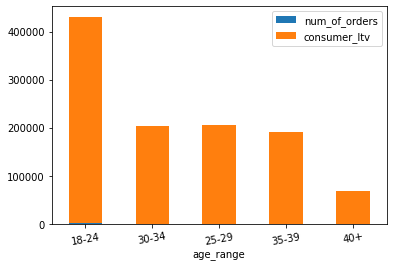

<Figure size 720x720 with 0 Axes>

In [44]:
# stacking customer LTV and orders by agegroup

aa=pd.DataFrame(a)
df = aa.join(b)

df.plot.bar(rot=10,stacked=True)
f = plt.figure(figsize=(10, 10))

### Transaction data analysis

In [46]:
# convert period to datetime
trans_data['period']=pd.to_datetime(trans_data['period'])

In [47]:
trans_data.dtypes

order_id                                  object
consumer_id                                int64
month                                      int64
year                                       int64
period                            datetime64[ns]
total_order_value                         object
discount                                  object
line_value                                object
line_sku_production_cost                  object
line_category                             object
line_sku                                  object
average_time_between_purchases           float64
dtype: object

In [48]:
# testing date filter
trans_data[trans_data.period >='2020-03-01']

,order_id,consumer_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
0,13121938B,13121938,3,2020,2020-03-01,168 €,0 €,168 €,25 €,Small leather goods,SMA4,NaN
1,13121938C,13121938,5,2020,2020-05-01,220 €,0 €,220 €,40 €,Fragrances,FRA4,2.0
2,13121938D,13121938,7,2020,2020-07-01,240 €,0 €,240 €,43 €,Fragrances,FRA5,2.0
4,13139819B,13139819,9,2020,2020-09-01,951 €,0 €,951 €,247 €,Mini bags,MIN3,8.0
5,13139819C,13139819,5,2020,2020-05-01,948 €,142 €,806 €,303 €,Bags,BAG4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3603,62035119D,62035119,9,2020,2020-09-01,205 €,0 €,205 €,37 €,Fragrances,FRA3,0.0
3607,62035419B,62035419,10,2020,2020-10-01,313 €,0 €,313 €,94 €,Accessories,ACC4,11.0
3611,62035719B,62035719,3,2020,2020-03-01,805 €,0 €,805 €,250 €,Mini bags,MIN7,4.0
3613,62035819B,62035819,5,2020,2020-05-01,805 €,0 €,805 €,250 €,Mini bags,MIN7,6.0


In [49]:
trans_data.columns

Index(['order_id', 'consumer_id', 'month', 'year', 'period',
       'total_order_value', 'discount', 'line_value',
       'line_sku_production_cost', 'line_category', 'line_sku',
       'average_time_between_purchases'],
      dtype='object')

In [50]:
# remove EUR sign
trans_data[['total_order_value', 'discount', 'line_value','line_sku_production_cost']] = trans_data[['total_order_value', 'discount', 'line_value',
       'line_sku_production_cost']].apply(lambda x: x.str[:-1])
trans_data.head()

,order_id,consumer_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
0,13121938B,13121938,3,2020,2020-03-01,168,0,168,25,Small leather goods,SMA4,NaN
1,13121938C,13121938,5,2020,2020-05-01,220,0,220,40,Fragrances,FRA4,2.0
2,13121938D,13121938,7,2020,2020-07-01,240,0,240,43,Fragrances,FRA5,2.0
3,13139819A,13139819,1,2020,2020-01-01,313,63,250,94,Accessories,ACC4,NaN
4,13139819B,13139819,9,2020,2020-09-01,951,0,951,247,Mini bags,MIN3,8.0


In [51]:
# convert line order values to float type
def convert_to_float(x):
    trans_data[x]= trans_data[x].apply(lambda x:x.replace(',',''))
    trans_data[x]= trans_data[x].apply(lambda x:x.strip())
    trans_data[x] = trans_data[x].apply(lambda x:pd.to_numeric(x,downcast='float'))

In [52]:
for i in ['total_order_value', 'discount', 'line_value','line_sku_production_cost']:
   convert_to_float(i)
trans_data.head()

,order_id,consumer_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases
0,13121938B,13121938,3,2020,2020-03-01,168.0,0.0,168.0,25.0,Small leather goods,SMA4,NaN
1,13121938C,13121938,5,2020,2020-05-01,220.0,0.0,220.0,40.0,Fragrances,FRA4,2.0
2,13121938D,13121938,7,2020,2020-07-01,240.0,0.0,240.0,43.0,Fragrances,FRA5,2.0
3,13139819A,13139819,1,2020,2020-01-01,313.0,63.0,250.0,94.0,Accessories,ACC4,NaN
4,13139819B,13139819,9,2020,2020-09-01,951.0,0.0,951.0,247.0,Mini bags,MIN3,8.0


In [53]:
trans_data[['total_order_value', 'discount', 'line_value','line_sku_production_cost']].describe()

,total_order_value,discount,line_value,line_sku_production_cost
count,3676.000000,3676.000000,3676.000000,3676.000000
mean,387.623776,24.100925,363.531284,116.843580
std,276.320403,41.102525,265.846880,94.708991
min,144.000000,0.000000,115.000000,25.000000
25%,210.000000,0.000000,204.000000,61.000000
50%,313.000000,0.000000,278.000000,94.000000
75%,447.000000,41.000000,418.000000,147.000000
max,1576.000000,315.000000,1576.000000,520.000000


In [54]:
trans_data.dtypes

order_id                                  object
consumer_id                                int64
month                                      int64
year                                       int64
period                            datetime64[ns]
total_order_value                        float64
discount                                 float64
line_value                               float64
line_sku_production_cost                 float64
line_category                             object
line_sku                                  object
average_time_between_purchases           float64
dtype: object

In [55]:
# testing float values
trans_data[['total_order_value', 'discount', 'line_value','line_sku_production_cost']].sum()

total_order_value           1424905.0
discount                      88595.0
line_value                  1336341.0
line_sku_production_cost     429517.0
dtype: float64

In [56]:
# create Profit field for transaction
trans_data['profit'] = trans_data['line_value']-trans_data['line_sku_production_cost']
trans_data.sort_values(by='profit',ascending=False)


,order_id,consumer_id,month,year,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,line_sku,average_time_between_purchases,profit
1979,59013919A,59013919,6,2020,2020-06-01,1576.0,0.0,1576.0,520.0,Bags,BAG3,NaN,1056.0
1854,79014719A,79014719,7,2020,2020-07-01,1576.0,0.0,1576.0,520.0,Bags,BAG3,NaN,1056.0
1129,99030619A,99030619,9,2020,2020-09-01,1576.0,0.0,1576.0,520.0,Bags,BAG3,NaN,1056.0
2809,30119589A,30119589,3,2020,2020-03-01,1576.0,0.0,1576.0,520.0,Bags,BAG3,NaN,1056.0
1989,59014919A,59014919,6,2020,2020-06-01,1576.0,0.0,1576.0,520.0,Bags,BAG3,NaN,1056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,13133419A,13133419,1,2020,2020-01-01,144.0,29.0,115.0,66.0,Small leather goods,SMA3,NaN,49.0
3544,62032219A,62032219,11,2019,2019-11-01,144.0,29.0,115.0,66.0,Small leather goods,SMA3,NaN,49.0
3626,62037219A,62037219,11,2019,2019-11-01,144.0,29.0,115.0,66.0,Small leather goods,SMA3,NaN,49.0
3581,62034219A,62034219,11,2019,2019-11-01,144.0,29.0,115.0,66.0,Small leather goods,SMA3,NaN,49.0


In [57]:
# check null profit
trans_data.profit.isnull().sum()

0

<AxesSubplot:>

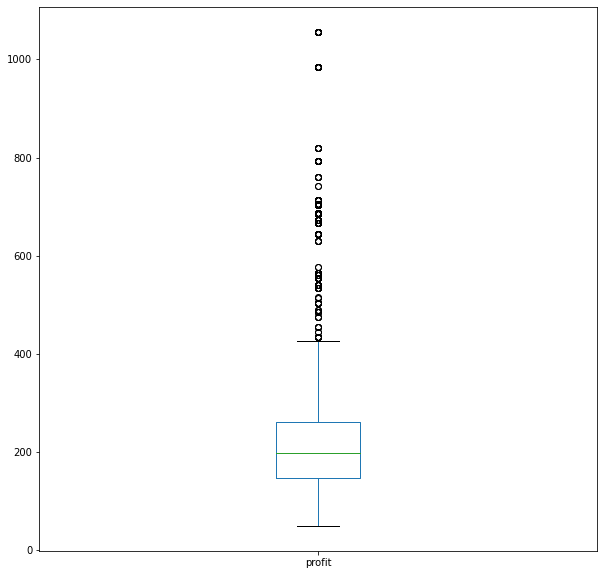

In [58]:
# check profit distribution 
trans_data.profit.plot(kind = 'box',figsize=[10,10])

In [59]:
# orders with profit more than 400
len(trans_data['profit'].loc[trans_data.profit>400])/len(trans_data['total_order_value'])

0.1191512513601741

<AxesSubplot:title={'center':'profit against time'}, xlabel='period'>

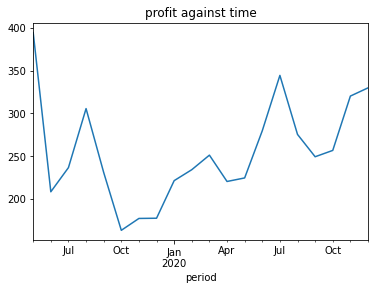

In [60]:
# time trend of profit
trans_data.groupby(by='period').profit.mean().plot(kind='line',title='profit against time')

<AxesSubplot:title={'center':'profit per line category'}, xlabel='line_category'>

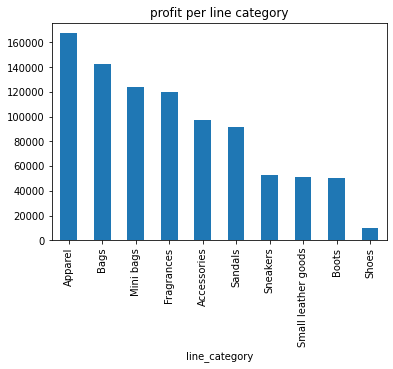

In [61]:
# group Profit by line category
trans_data.groupby(by='line_category').profit.sum().sort_values(ascending=False).plot(kind='bar',title='profit per line category')

## Transaction & Customer Analysis

In [62]:
# inner join transaction & customer table
tc_df = trans_data.merge(cust_data,on='consumer_id')
tc_df.head()

,order_id,consumer_id,month_x,year_x,period,total_order_value,discount,line_value,line_sku_production_cost,line_category,...,month_y,year_y,marketing_option,status,num_of_orders,new_active,new_repeaters,consumer_ltv,lower_age,upper_age
0,13139819A,13139819,1,2020,2020-01-01,313.0,63.0,250.0,94.0,Accessories,...,1,2020,0,Active,4,0,1,3160,25,29
1,13139819B,13139819,9,2020,2020-09-01,951.0,0.0,951.0,247.0,Mini bags,...,1,2020,0,Active,4,0,1,3160,25,29
2,13139819C,13139819,5,2020,2020-05-01,948.0,142.0,806.0,303.0,Bags,...,1,2020,0,Active,4,0,1,3160,25,29
3,13139819D,13139819,8,2020,2020-08-01,948.0,0.0,948.0,303.0,Bags,...,1,2020,0,Active,4,0,1,3160,25,29
4,13139919A,13139919,1,2020,2020-01-01,1491.0,298.0,1193.0,507.0,Bags,...,1,2020,0,Active,4,0,1,4794,30,34


In [63]:
# top 10 customer by profit with associated demographics profile
cu_df = tc_df.groupby(by=['consumer_id','country','age_range','gender']).profit.sum().sort_values(ascending=False)
cu_df = cu_df.reset_index(level=["country", "age_range", "gender"])
cu_df.head(10)

,country,age_range,gender,profit
consumer_id,,,,
99053019,Italy,35-39,F,4970.0
30119399,USA,35-39,F,4779.0
48012919,Italy,25-29,F,3836.0
13992019,Italy,35-39,F,2807.0
13139919,Italy,30-34,F,2801.0
12790167,Austria,18-24,F,2501.0
62034819,Italy,30-34,F,2415.0
30119769,Austria,18-24,F,2317.0
30119379,Hungary,30-34,F,2211.0


In [64]:
# top 10 countries by profit
x = tc_df.groupby(by='country').profit.sum().sort_values(ascending=False).values
y = tc_df.groupby(by='country').profit.sum().sort_values(ascending=False).keys()
c_df =pd.DataFrame(x,columns=['profit'],index=y)

c_df.nlargest(10,'profit')

,profit
country,
Italy,612520.0
Saudi Arabia,35596.0
Germany,20806.0
Austria,18799.0
Spain,18181.0
Hungary,17078.0
Greece,15399.0
USA,15044.0
Czech Republic,13744.0


In [65]:
# top 3 age group by profit
x = tc_df.groupby(by='age_range').profit.sum().sort_values(ascending=False).values
y = tc_df.groupby(by='age_range').profit.sum().sort_values(ascending=False).keys()
a_df =pd.DataFrame(x,columns=['profit'],index=y)

a_df.nlargest(3,'profit')

,profit
age_range,
18-24,307121.0
25-29,144794.0
30-34,141539.0


In [66]:
# find year period over 365 days
year_before = (date(2020,12,1)-timedelta(days=365)).isoformat()
year_before

'2019-12-02'

In [73]:
# Time Between Purchases (TBP) customers over the year
tc_df[tc_df.period>year_before].average_time_between_purchases.mean()

3.7244258872651357

In [74]:
# Purchase Frequency (PF) per customer over the year
tc_df[tc_df.period>year_before].num_of_orders.sum()/tc_df.consumer_id.nunique()

1.6419844502036283

In [75]:
# Repeat Purchase Rate (RPR) - percentage of customer purchased more than once over the year
tc_df[tc_df.period>year_before].new_repeaters.sum()/tc_df.consumer_id.nunique()

0.23361717882265828

In [104]:
# returning customer ratio
len(tc_df[(tc_df.period>year_before) & (tc_df['new_repeaters']==1)])/tc_df.consumer_id.nunique()

0.23361717882265828